In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grocery sales/data.csv')
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/google-brain/inception-v3')
od.download('https://www.kaggle.com/datasets/keras/xception')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurav065
Your Kaggle Key: ··········


100%|██████████| 96.3M/96.3M [00:05<00:00, 20.0MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurav065
Your Kaggle Key: ··········


100%|██████████| 155M/155M [00:07<00:00, 20.6MB/s]


In [ ]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df = df.drop(['Unnamed: 0', 'Date'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [1]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

NameError: ignored

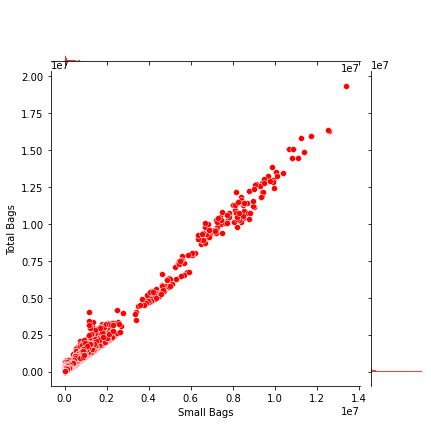

In [ ]:
sns.jointplot(x='Small Bags',y='Total Bags',data=df, color='red')

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=df,color='red')

NameError: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.44, 3.25)

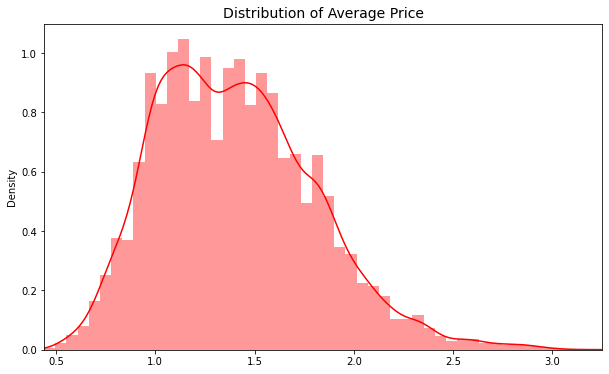

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
price_val = df['AveragePrice'].values
sns.distplot(price_val, color='r')
ax.set_title('Distribution of Average Price', fontsize=14)
ax.set_xlim([min(price_val), max(price_val)])

In [ ]:
X = df.drop(['AveragePrice'], axis = 1).values
y = df['AveragePrice'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 9])
labelencoder_X_2 = LabelEncoder()
X[:, 9] = labelencoder_X_2.fit_transform(X[:, 10])
labelencoder_X_3 = LabelEncoder()
X[:, 10] = labelencoder_X_3.fit_transform(X[:, 10])

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
scaled_features = scaler.transform(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:9])
df_feat.head()

NameError: ignored

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = OneVsRestClassifier(logreg, n_jobs=1)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn = OneVsRestClassifier(knn, n_jobs=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

from sklearn.svm import SVC
svc = SVC()
svc = OneVsRestClassifier(svc, n_jobs=1)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = OneVsRestClassifier(decision_tree, n_jobs=1)
decision_tree.fit(X_train, y_train)
pred_tree = decision_tree.predict(X_test)

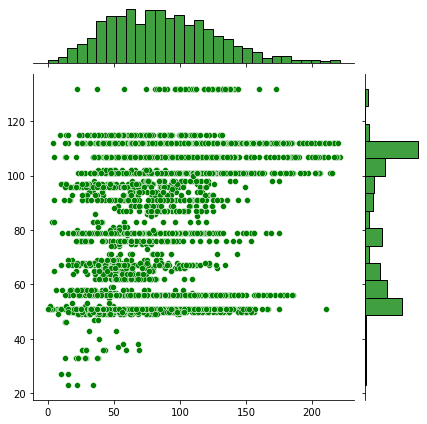

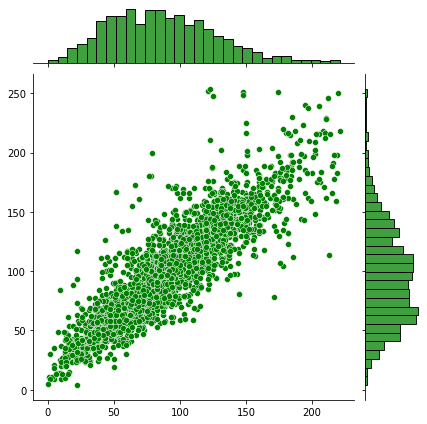

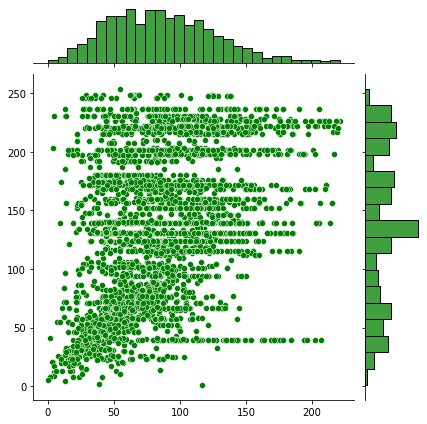

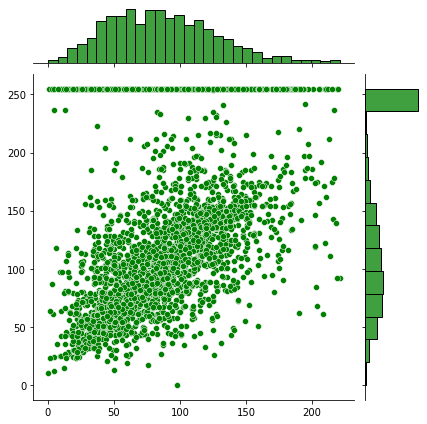

In [ ]:
sns.jointplot(x=y_test, y=pred_logreg, color= 'g')
sns.jointplot(x=y_test, y=pred_knn, color= 'g')
sns.jointplot(x=y_test, y=pred_svc, color= 'g')
sns.jointplot(x=y_test, y=pred_tree, color= 'g')

plt.show()

Text(0, 0.5, 'Error Rate')

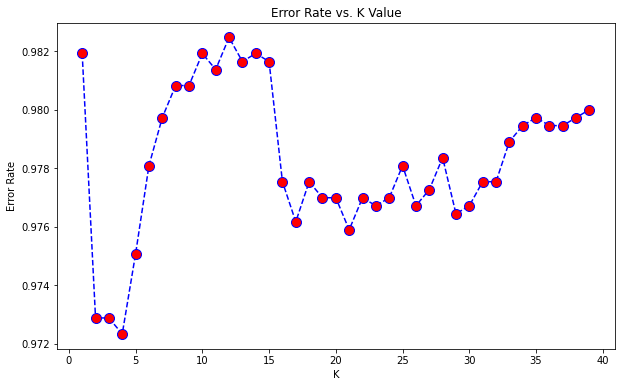

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

[]

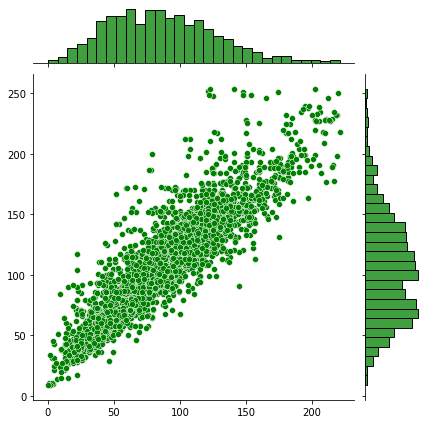

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = OneVsRestClassifier(knn, n_jobs=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
sns.jointplot(x=y_test, y=pred_knn, color= 'g')
plt.plot()

In [ ]:
print(X_train.shape[1])
print(X_train.shape[0])
print(len(np.unique(y_train)))
print((len(np.unique(y_train)) + X_train.shape[0]) /2)

11
14599
256
7427.5


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from numpy import argmax

BATCH_SIZE = 1000
EPOCHS = 30
VALIDATION_SPLIT = 0.1
file_path="weights_base3.best.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5)
callbacks_list = [checkpoint, early]

def get_model():
    model = Sequential()
    model.add(Dense(7428, input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7428))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy']
                 )
    model.summary()
    return model
model_nn = get_model()
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )
model_nn.load_weights(file_path)
pred_ann = argmax(model_nn.predict(X_test), axis = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7428)              89136     
                                                                 
 activation (Activation)     (None, 7428)              0         
                                                                 
 dropout (Dropout)           (None, 7428)              0         
                                                                 
 dense_1 (Dense)             (None, 7428)              55182612  
                                                                 
 activation_1 (Activation)   (None, 7428)              0         
                                                                 
 dropout_1 (Dropout)         (None, 7428)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

14/14 [==============================] - 121s 9s/step - loss: 5.2026 - accuracy: 0.0108 - val_loss: 5.0681 - val_accuracy: 0.0116
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 4.9844 - accuracy: 0.0154

14/14 [==============================] - 122s 9s/step - loss: 4.9844 - accuracy: 0.0154 - val_loss: 4.9279 - val_accuracy: 0.0116
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 4.8549 - accuracy: 0.0177

14/14 [==============================] - 120s 9s/step - loss: 4.8549 - accuracy: 0.0177 - val_loss: 4.8399 - val_accuracy: 0.0144
Epoch 4/30
14/14 [==============================] - ETA: 0s - loss: 4.7692 - accuracy: 0.0184

14/14 [==============================] - 117s 8s/step - loss: 4.7692 - accuracy: 0.0184 - val_loss: 4.7983 - val_accuracy: 0.0096
Epoch 5/30
14/14 [==============================] - ETA: 0s - loss: 4.7185 - accuracy: 0.0205

14/14 [==============================] - 122s 9s/step - loss: 4.7185 - accuracy: 0.0205 - val_loss: 4.7465 - val_accuracy: 0.0185
Epoch 6/30
14/14 [==============================] - ETA: 0s - loss: 4.6828 - accuracy: 0.0228

14/14 [==============================] - 118s 8s/step - loss: 4.6828 - accuracy: 0.0228 - val_loss: 4.7422 - val_accuracy: 0.0192
Epoch 7/30
14/14 [==============================] - ETA: 0s - loss: 4.6396 - accuracy: 0.0241

14/14 [==============================] - 124s 9s/step - loss: 4.6396 - accuracy: 0.0241 - val_loss: 4.7249 - val_accuracy: 0.0158
Epoch 8/30
14/14 [==============================] - ETA: 0s - loss: 4.6139 - accuracy: 0.0285

14/14 [==============================] - 123s 9s/step - loss: 4.6139 - accuracy: 0.0285 - val_loss: 4.7182 - val_accuracy: 0.0151
Epoch 9/30
14/14 [==============================] - ETA: 0s - loss: 4.5919 - accuracy: 0.0274

14/14 [==============================] - 120s 8s/step - loss: 4.5919 - accuracy: 0.0274 - val_loss: 4.7131 - val_accuracy: 0.0205
Epoch 10/30
14/14 [==============================] - ETA: 0s - loss: 4.5595 - accuracy: 0.0296

14/14 [==============================] - 117s 8s/step - loss: 4.5595 - accuracy: 0.0296 - val_loss: 4.7181 - val_accuracy: 0.0158
Epoch 11/30
14/14 [==============================] - ETA: 0s - loss: 4.5323 - accuracy: 0.0321

14/14 [==============================] - 119s 8s/step - loss: 4.5323 - accuracy: 0.0321 - val_loss: 4.7051 - val_accuracy: 0.0185
Epoch 12/30
14/14 [==============================] - ETA: 0s - loss: 4.5091 - accuracy: 0.0308

14/14 [==============================] - 120s 9s/step - loss: 4.5091 - accuracy: 0.0308 - val_loss: 4.7161 - val_accuracy: 0.0233
Epoch 13/30
14/14 [==============================] - ETA: 0s - loss: 4.4842 - accuracy: 0.0368

14/14 [==============================] - 120s 8s/step - loss: 4.4842 - accuracy: 0.0368 - val_loss: 4.6949 - val_accuracy: 0.0171
Epoch 14/30
14/14 [==============================] - ETA: 0s - loss: 4.4585 - accuracy: 0.0372

14/14 [==============================] - 116s 8s/step - loss: 4.4585 - accuracy: 0.0372 - val_loss: 4.7366 - val_accuracy: 0.0171
Epoch 15/30
14/14 [==============================] - ETA: 0s - loss: 4.4556 - accuracy: 0.0375

14/14 [==============================] - 118s 8s/step - loss: 4.4556 - accuracy: 0.0375 - val_loss: 4.7091 - val_accuracy: 0.0226
Epoch 16/30
14/14 [==============================] - ETA: 0s - loss: 4.4240 - accuracy: 0.0417

14/14 [==============================] - 117s 8s/step - loss: 4.4240 - accuracy: 0.0417 - val_loss: 4.6955 - val_accuracy: 0.0253
Epoch 17/30
14/14 [==============================] - ETA: 0s - loss: 4.4027 - accuracy: 0.0428

14/14 [==============================] - 123s 9s/step - loss: 4.4027 - accuracy: 0.0428 - val_loss: 4.7066 - val_accuracy: 0.0240
Epoch 18/30
14/14 [==============================] - ETA: 0s - loss: 4.3872 - accuracy: 0.0435

14/14 [==============================] - 119s 9s/step - loss: 4.3872 - accuracy: 0.0435 - val_loss: 4.7104 - val_accuracy: 0.0199
Epoch 19/30
14/14 [==============================] - ETA: 0s - loss: 4.3620 - accuracy: 0.0445

14/14 [==============================] - 117s 8s/step - loss: 4.3620 - accuracy: 0.0445 - val_loss: 4.7085 - val_accuracy: 0.0281
Epoch 20/30
14/14 [==============================] - ETA: 0s - loss: 4.3336 - accuracy: 0.0499

14/14 [==============================] - 117s 8s/step - loss: 4.3336 - accuracy: 0.0499 - val_loss: 4.7355 - val_accuracy: 0.0151
Epoch 21/30
14/14 [==============================] - ETA: 0s - loss: 4.3133 - accuracy: 0.0505

14/14 [==============================] - 119s 8s/step - loss: 4.3133 - accuracy: 0.0505 - val_loss: 4.7068 - val_accuracy: 0.0212
Epoch 22/30
14/14 [==============================] - ETA: 0s - loss: 4.3124 - accuracy: 0.0493

14/14 [==============================] - 119s 9s/step - loss: 4.3124 - accuracy: 0.0493 - val_loss: 4.7381 - val_accuracy: 0.0226
Epoch 23/30
14/14 [==============================] - ETA: 0s - loss: 4.2773 - accuracy: 0.0544

14/14 [==============================] - 119s 8s/step - loss: 4.2773 - accuracy: 0.0544 - val_loss: 4.7290 - val_accuracy: 0.0178
Epoch 24/30
14/14 [==============================] - ETA: 0s - loss: 4.2529 - accuracy: 0.0541

14/14 [==============================] - 119s 9s/step - loss: 4.2529 - accuracy: 0.0541 - val_loss: 4.7517 - val_accuracy: 0.0205
Epoch 25/30
14/14 [==============================] - ETA: 0s - loss: 4.2459 - accuracy: 0.0543

14/14 [==============================] - 118s 8s/step - loss: 4.2459 - accuracy: 0.0543 - val_loss: 4.7437 - val_accuracy: 0.0219
Epoch 26/30
14/14 [==============================] - ETA: 0s - loss: 4.2284 - accuracy: 0.0583

14/14 [==============================] - 118s 8s/step - loss: 4.2284 - accuracy: 0.0583 - val_loss: 4.7597 - val_accuracy: 0.0212
Epoch 27/30
14/14 [==============================] - ETA: 0s - loss: 4.2005 - accuracy: 0.0610

14/14 [==============================] - 120s 9s/step - loss: 4.2005 - accuracy: 0.0610 - val_loss: 4.7723 - val_accuracy: 0.0260
Epoch 28/30
14/14 [==============================] - ETA: 0s - loss: 4.1988 - accuracy: 0.0629

14/14 [==============================] - 116s 8s/step - loss: 4.1988 - accuracy: 0.0629 - val_loss: 4.7750 - val_accuracy: 0.0240
Epoch 29/30
14/14 [==============================] - ETA: 0s - loss: 4.1729 - accuracy: 0.0622

14/14 [==============================] - 114s 8s/step - loss: 4.1729 - accuracy: 0.0622 - val_loss: 4.7653 - val_accuracy: 0.0226
Epoch 30/30
14/14 [==============================] - ETA: 0s - loss: 4.1486 - accuracy: 0.0690

115/115 [==============================] - 16s 140ms/step


[]

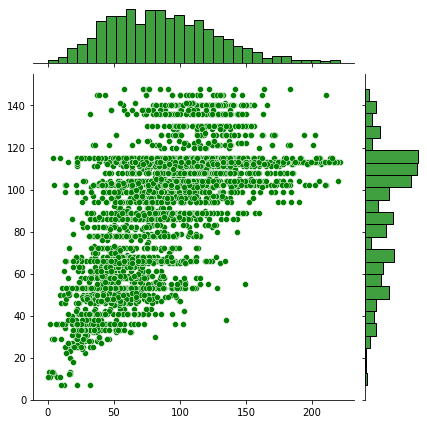

In [ ]:
sns.jointplot(x=y_test, y=pred_ann, color= 'g')
plt.plot()

#alexNet



In [ ]:
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(256,activation='softmax'))
model.summary()

NameError: ignored

In [ ]:
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )

VGG16

In [ ]:
base_model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )

Inception google net

In [ ]:
weight_file = '/content/inception-v3/inception_v3.ckpt'
pre_trained_model = InceptionV3(input_shape = (75,75,3),
                                include_top = False,
                               weights = 'imagenet')

for layer in pre_trained_model.layers:
      layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.summary()


In [ ]:
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )

Xception

In [ ]:
import numpy as np
import pandas as pd 
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras.applications.xception as xception
import zipfile
import sys
import time
import tensorflow.keras as keras
import tensorflow as tf
import re

from PIL import Image
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D
# from tensorflow.keras.layers.experimental.preprocessing import Normalization
from keras.models import Model, Sequential
from keras.preprocessing import image
# from tensorflow.keras.utils import to_categorical
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# print('setup successful!')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import keras.applications.xception as xception

xception_layer = xception.Xception(include_top = False, input_shape = (64,64,3),
                       weights = '/content/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5')

# We don't want to train the imported weights
xception_layer.trainable = False


model = Sequential()
model.add(keras.Input(shape=(64,64,3)))

#create a custom layer to apply the preprocessing
def xception_preprocessing(img):
  return xception.preprocess_input(img)

model.add(Lambda(xception_preprocessing))

model.add(xception_layer)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(256, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.summary()
# 2022-08-08 14:49:15.96184

In [ ]:
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )

vgg vs Xception

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [97.78, 95.67]
plt.style.use('ggplot')
x = ['VGG16', 'Xception']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(100,100)

vgg vs Alexnet

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [97.78,94.55]
plt.style.use('ggplot')
x = ['VGG16', 'Alexnet']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(98,98)

vgg vs google net

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [97.78,96.77 ]
plt.style.use('ggplot')
x = ['VGG16', 'GoogleNET']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(100,100)

vgg vs RNN

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-3-271b308fca1d>:9: UserWarning: Attempting to set identical bottom == top == 97 results in singular transformations; automatically expanding.
  ax.set_ylim(97,97)


(92.15, 101.85)

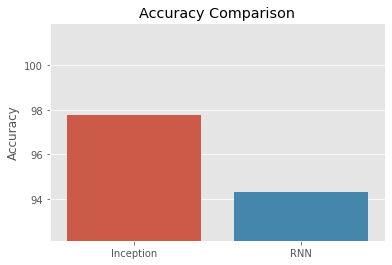

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [97.78, 94.33]
plt.style.use('ggplot')
x = ['VGG16', 'RNN']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(97,97)